<a href="https://colab.research.google.com/github/abdipourasl/Machine-Learning-1402/blob/main/ML_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN - Iris

## 1. Load Data & Normalization

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Normalize the data
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.25, random_state=99)

## 2. Train Model & Evaluate Test Data

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

neighbors = range(1, 21)  # Range of neighbors from 1 to 20

accuracy_scores = []
confusion_matrices = []

for n in neighbors:
    # Initialize KNN
    KNN = KNeighborsClassifier(n_neighbors=n)

    # Train
    KNN.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = KNN.predict(X_test)

    # accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    # confusion matrix
    confusion = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(confusion)


## Accuracy & Confusion Matrix

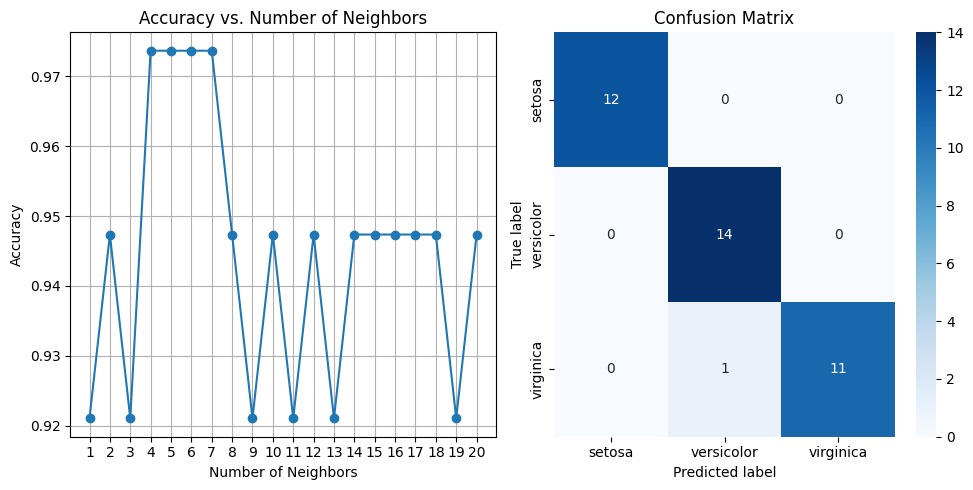

Best accuracy: 0.9736842105263158


In [ ]:
import seaborn as sns

# Accuracy for different n_neighbors
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(neighbors, accuracy_scores, marker='o')
plt.title('Accuracy vs. Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neighbors)
plt.grid(True)

# Confusion matrix for the best model
best_accuracy_index = np.argmax(accuracy_scores)
best_confusion_matrix = confusion_matrices[best_accuracy_index]
plt.subplot(1, 2, 2)
# Plot confusion matrix for the best model
best_accuracy_index = np.argmax(accuracy_scores)
best_confusion_matrix = confusion_matrices[best_accuracy_index]
plt.subplot(1, 2, 2)
sns.heatmap(best_confusion_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

print("Best accuracy:", max(accuracy_scores))


So the Best N is 4 and accuray is 97.36

#SVM Iris

## 1. Load Data & Normalization

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split


# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Normalize the data
# scaler = MinMaxScaler()
scaler = StandardScaler()

X_normalized = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.25, random_state=50)

## 2. Train Model

In [50]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# SVM models with different kernels
kernels = ['linear', 'poly', 'rbf','sigmoid']
models = []

for kernel in kernels:
    # Initialize SVM
    svm = SVC(kernel=kernel)

    # Train
    svm.fit(X_train, y_train)
    models.append(svm)

## 3. Train SVM for different Parameters

In [51]:
# Change C
for kernel in kernels:
    # Initialize SVM
    svm = SVC(kernel=kernel, C=2.0)
    # Train
    svm.fit(X_train, y_train)
    models.append(svm)

# Change gamma
for kernel in kernels:
    # Initialize SVM
    svm = SVC(kernel=kernel, gamma=0.1, C=1.0)

    # Train
    svm.fit(X_train, y_train)
    models.append(svm)

# Change degree
for kernel in kernels:
    # Initialize SVM
    svm = SVC(kernel=kernel, degree=2, C=1.0, gamma='scale')
    # Train
    svm.fit(X_train, y_train)
    models.append(svm)


## 4. Evaluate Model

Accuracy of SVM with linear kernel: 92.10526315789474 %


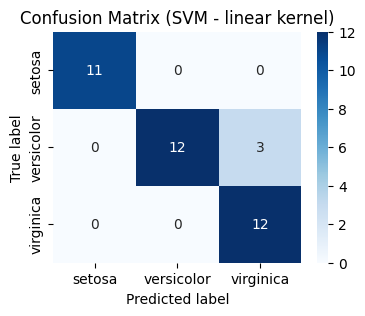

Accuracy of SVM with poly kernel: 100.0 %


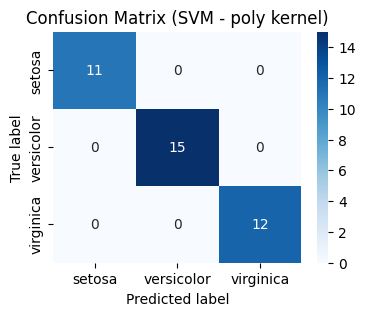

Accuracy of SVM with rbf kernel: 94.73684210526315 %


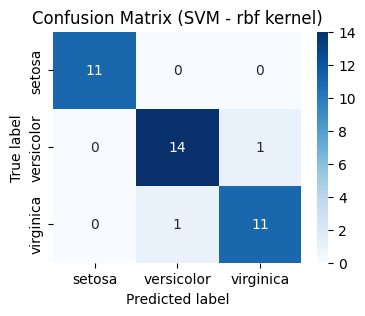

Accuracy of SVM with sigmoid kernel: 84.21052631578947 %


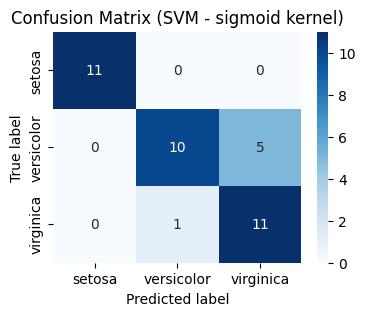

Accuracy of SVM with linear kernel: 92.10526315789474 %


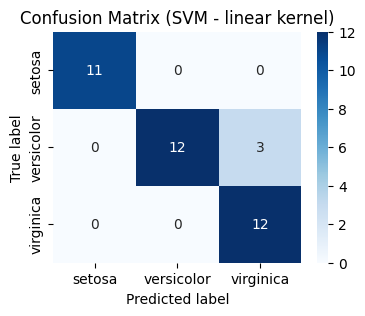

Accuracy of SVM with poly kernel: 100.0 %


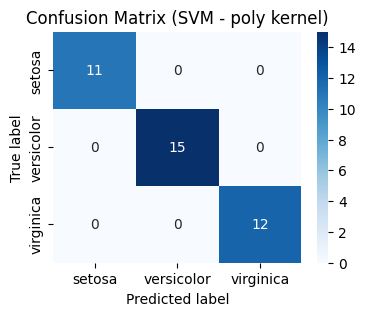

Accuracy of SVM with rbf kernel: 94.73684210526315 %


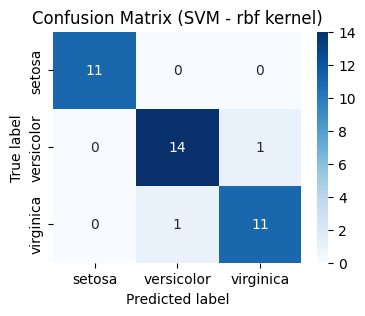

Accuracy of SVM with sigmoid kernel: 86.8421052631579 %


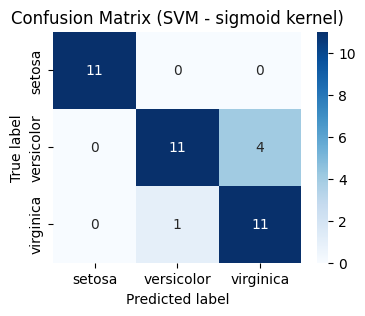

Accuracy of SVM with linear kernel: 92.10526315789474 %


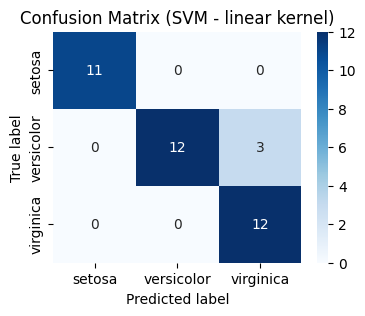

Accuracy of SVM with poly kernel: 92.10526315789474 %


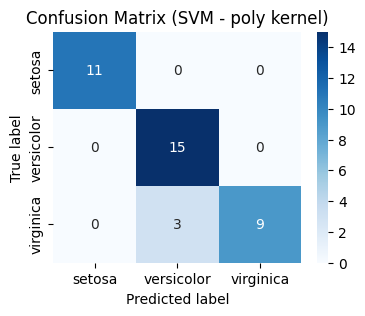

Accuracy of SVM with rbf kernel: 94.73684210526315 %


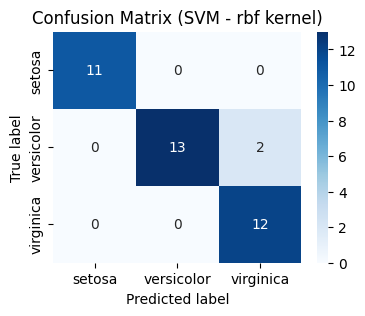

Accuracy of SVM with sigmoid kernel: 97.36842105263158 %


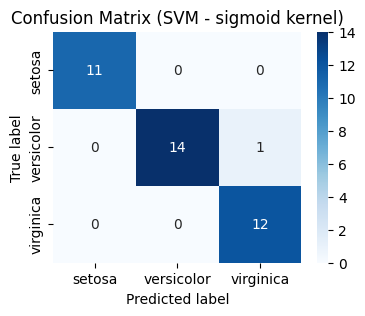

Accuracy of SVM with linear kernel: 92.10526315789474 %


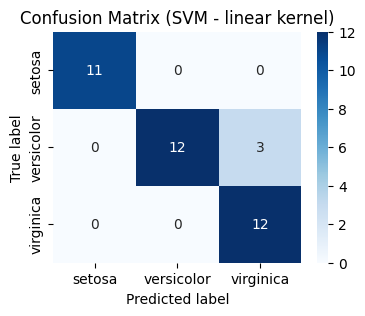

Accuracy of SVM with poly kernel: 89.47368421052632 %


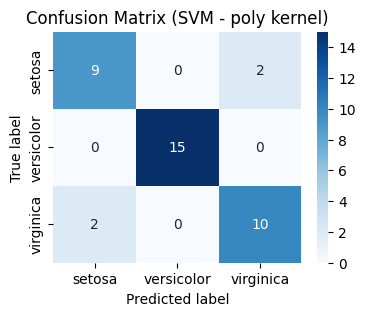

Accuracy of SVM with rbf kernel: 94.73684210526315 %


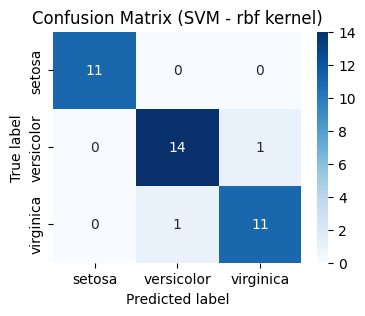

Accuracy of SVM with sigmoid kernel: 84.21052631578947 %


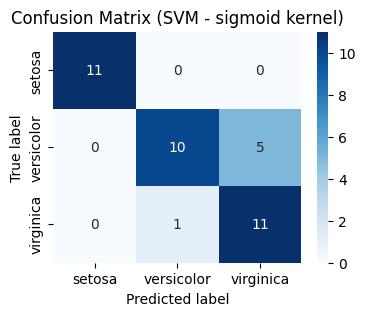

In [52]:
for i, model in enumerate(models):
    # Make predictions on the test set
    y_pred = model.predict(X_test)


    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of SVM with {kernels[i%4]} kernel:", accuracy*100,"%")
    # print("SVM Parameters:")
    # for param, value in svm.get_params().items():
    #     print(f"{param}: {value}")


    # # Calculate confusion matrix
    confusion = confusion_matrix(y_test, y_pred)
    # print(f"Confusion matrix of SVM with {kernels[i]} kernel:")
    # print(confusion)

    plt.figure(figsize=(4, 3))
    sns.heatmap(confusion, annot=True, cmap="Blues", fmt="d", xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.title(f'Confusion Matrix (SVM - {kernels[i%4]} kernel)')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()


#K-means - Titanic


## 1. Load Dataset

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## 2. Preprocessing

### Handling Missing Values & Scaling

In [11]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

numeric_features = ['age', 'fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

### Encoding Categorical Features

In [12]:
from sklearn.preprocessing import OneHotEncoder
categorical_features = ['embarked', 'sex', 'class']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

### Processor

In [13]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Preprocess the data
X = preprocessor.fit_transform(titanic)

## 3. PCA

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

## 4. Calculate WCSS for different numbers of clusters

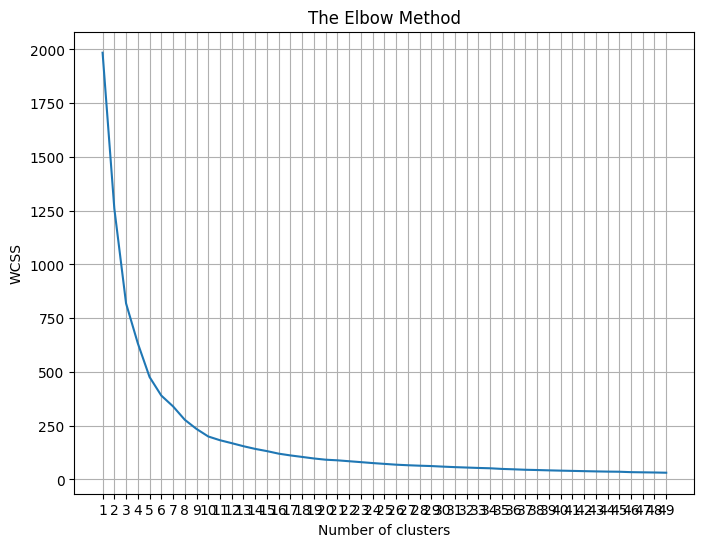

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 50):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 50), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-cluster sum of squares
plt.xticks(range(1, 50))
plt.grid(True)
plt.show()


## 5. K-Means for K=9

In [16]:
k_optimal = 9
kmeans_optimal = KMeans(n_clusters=k_optimal, random_state=0).fit(X_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## 6. Plot Clusters

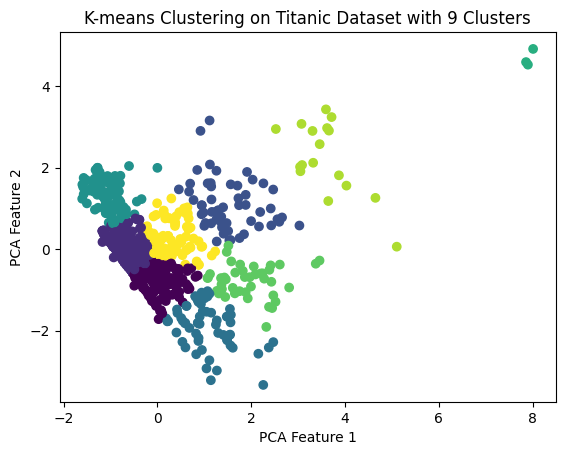

In [17]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_optimal.labels_, cmap='viridis')
plt.title(f'K-means Clustering on Titanic Dataset with {k_optimal} Clusters')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.show()

#Genetic Algorithms for: $$\sum_{i=1}^{30} \left( x^2 + 10 \cdot \cos(2 \pi x) + 10 \right)$$



In [20]:
pip install deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 3.0 MB/s eta 0:00:00


In [57]:
import numpy as np
from deap import base, creator, tools, algorithms

# Define the objective function
def objective_function(individual):
    return sum(x**2 + 10 * np.cos(2 * np.pi * x) + 10 for x in individual),

# Define the optimization problem
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_float", np.random.uniform, -5.12, 5.12)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=30)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", objective_function)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.2, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# Create the population
population = toolbox.population(n=50)

# Define the statistics to be collected
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", np.min)
stats.register("avg", np.mean)

# Perform the genetic algorithm
pop, logbook = algorithms.eaSimple(population, toolbox, cxpb=0.7, mutpb=0.2, ngen=100, stats=stats, verbose=True)

# Get the best individual
best_ind = tools.selBest(pop, k=1)[0]
print("Best individual:", best_ind)
print("Best fitness:", best_ind.fitness.values[0])


gen	nevals	min    	avg    
0  	50    	464.464	575.156
1  	43    	464.464	573.616
2  	35    	443.761	559.064
3  	39    	441.452	536.055
4  	46    	398.972	519.39 
5  	38    	342.165	488.587
6  	33    	356.242	462.862
7  	40    	348.473	432.229
8  	42    	325.146	418.948
9  	43    	325.146	417.649
10 	31    	286.797	393.305
11 	43    	304.915	391.098
12 	40    	304.915	403.386
13 	34    	304.915	401.686
14 	36    	314.567	393.09 
15 	39    	315.685	387.739
16 	42    	262.433	373.82 
17 	40    	262.433	373.626
18 	42    	262.998	359.966
19 	37    	261.061	339.797
20 	46    	285.721	357.515
21 	42    	258.372	349.507
22 	43    	258.372	344.206
23 	28    	263.971	325.488
24 	35    	243.635	321.715
25 	38    	234.302	309.523
26 	37    	225.207	293.275
27 	41    	225.207	283.765
28 	36    	228.655	277.687
29 	41    	219.969	280.218
30 	40    	224.287	278.277
31 	37    	225.648	276.508
32 	35    	220.1  	262.327
33 	34    	209.16 	259.084
34 	40    	205.442	252.909
35 	32    	153.632	244.132
3